In [262]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [263]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_pp_posts_bolsonaro_replaced_to_empty.csv'
df_candidate = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [264]:
df_candidate.head(15)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
0,2020-03-22T18:47:55+0000,211857482296579_1826486634166981,agora videoconferencia presidente jair bolsona...,agora videoconferencia presidente presidente...,23151,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p180x54...,129465,147,318,21,112,10345,True
1,2020-03-22T16:30:39+0000,211857482296579_1826339070848404,inscricoes selecao profissionais atuacao progr...,inscricoes selecao profissionais atuacao progr...,5703,mobile_status_update,None,52238,128,61,5,43,2514,True
2,2020-03-22T13:37:26+0000,211857482296579_1826130007535977,ministerio saude ministro mandetta reuniao vir...,ministerio saude ministro mandetta reuniao vir...,11818,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p180x54...,97986,73,141,16,65,6292,True
3,2020-03-22T11:07:01+0000,211857482296579_1825937284221916,governo federal distribui milhoes testes rapid...,governo federal distribui milhoes testes rapid...,39284,mobile_status_update,None,165539,88,393,20,68,16747,True
4,2020-03-22T02:06:48+0000,211857482296579_1825422034273441,chama precaucao medicamento barato caso venha ...,chama precaucao medicamento barato caso venha ...,27236,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/9052732...,162513,968,318,88,509,20723,True
5,2020-03-21T22:22:48+0000,211857482296579_1825061764309468,reconheco seriedade momento temor muitos brasi...,reconheco seriedade momento temor muitos brasi...,40794,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/9065012...,305358,918,478,266,1267,48834,True
6,2020-03-21T18:36:01+0000,211857482296579_1824728371009474,hospital albert einstein possivel cura pacient...,hospital albert einstein possivel cura pacient...,201803,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/75...,215237,480,815,60,431,34278,True
7,2020-03-21T11:33:30+0000,211857482296579_1824261207722857,dois dedos prosa ratinho assista link youtube,dois dedos prosa ratinho assista link youtube,33971,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/83...,106117,336,317,113,624,15368,True
8,2020-03-21T02:37:00+0000,211857482296579_1823872341095077,assinei medida provisoria deixando claro ser c...,assinei medida provisoria deixando claro ser c...,9174,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/s720x72...,112873,181,200,106,1121,7582,True
9,2020-03-21T00:16:41+0000,211857482296579_1823743497774628,via eduardo bolsonaro,via eduardo,8150,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p600x60...,79762,435,111,13,160,6480,True


In [265]:
#===========================================================================
# obter o dataframe com os posts do candidato no ano de 2018
#===========================================================================

time_mask = (df_candidate['created_time'] >= '2018-01-01') & (df_candidate['created_time'] <= '2018-12-31')

df_election = df_candidate[time_mask]

n_total_posts = len(df_election)
print('número total de posts: {0}'.format(str(n_total_posts)))

número total de posts: 588


In [266]:
n_posts_with_textual_messages = df_election[df_election.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_election[df_election.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 577
número de posts sem mensagens textuais: 11


In [267]:
# Devemos remover esses posts sem menssagem antes de continuar a nossa análise?
# renomear depois o df caso sim

#filter_mask  = df_candidate['has_textual_message'] == True
#df_candidate = df_candidate[filter_mask]
#print('número de posts do df desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidate))))

In [268]:
# separando o df de treinamento (30%) e o df de testes(70%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_election,train_size=0.7,test_size=0.3,shuffle=False)

In [269]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 411


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
1093,2018-12-18T21:00:19+0000,211857482296579_313867762671180,politica nacional link youtube,politica nacional link youtube,37918,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/48...,132089,969,532,130,445,40413,True
1094,2018-12-12T22:04:40+0000,211857482296579_2275948909316886,atualizacao sobre intensos trabalhos realizado...,atualizacao sobre intensos trabalhos realizado...,42391,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/s6...,151848,1326,686,146,549,53937,True
1095,2018-11-01T15:12:36+0000,211857482296579_344866046060618,falamos imprensa primeira vez apos juiz sergio...,falamos imprensa primeira vez apos juiz sergio...,27761,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,113960,141,1090,12,25,18545,True
1096,2018-10-31T00:06:06+0000,211857482296579_248928202447795,felipe moura brasil pouco trajetoria politica ...,felipe moura brasil pouco trajetoria politica ...,6426,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,65783,69,559,10,23,7041,True
1097,2018-10-29T00:09:20+0000,211857482296579_2076031999084232,agradecimento todos confianca apoio,agradecimento todos confianca apoio,67448,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/s6...,315148,2531,1027,306,811,154148,True


In [270]:
print('número de posts do conjunto de teste (30%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (30%): 177


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
1504,2018-04-13T12:58:40+0000,211857482296579_1048809178601401,imprensa diz nao base politica solida disputar...,imprensa diz nao base politica solida disputar...,16177,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/28...,43575,240,588,9,37,3597,True
1505,2018-04-12T23:27:38+0000,211857482296579_1048509101964742,aeroporto boa vista obrigado roraima,aeroporto boa vista obrigado roraima,8653,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/28...,29752,129,410,7,42,2019,True
1506,2018-04-12T11:31:39+0000,211857482296579_1048229048659414,hoje quintafeira abril h pousaremos boa vistar...,hoje quintafeira abril h pousaremos boa vistar...,982,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/27...,9357,33,29,1,9,571,True
1507,2018-04-12T01:07:16+0000,211857482296579_1048001828682136,lider pt pergunta candidato voces plenario res...,lider pt pergunta candidato voces plenario res...,48232,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/27...,41797,22279,134,12,52,5486,True
1508,2018-04-11T15:45:26+0000,211857482296579_1047794218702897,brigada paraquedista brasil acima tudo,brigada paraquedista,12160,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/29...,9210,120,83,3,44,540,True


In [271]:
#============================================================================================
# Implementacao do lda
#============================================================================================

In [272]:
cv = CountVectorizer()
data_vectorized = cv.fit_transform(df_training['m_m_p_replaced_to_empty'])

In [273]:
n_components = 10

model_lda = LatentDirichletAllocation(n_components=n_components, # Number of topics
                                      max_iter=50,
                                      random_state=100,
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
model_lda.fit(data_vectorized)

LatentDirichletAllocation(max_iter=50, n_jobs=-1, random_state=100)

In [274]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Log Likelihood: ", model_lda.score(data_vectorized)) # Maior, melhor
print("Perplexity: ", model_lda.perplexity(data_vectorized)) # Menor, Melhor
# See model parameters
print(model_lda.get_params())

Log Likelihood:  -30498.339340657774
Perplexity:  2667.4058896242036
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 50, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [275]:
# objetivo: tentar encontrar um numero bom de tópicos a fim de conseguirmos destinguir as
# categorias 

'''
#forma antiga
for index, topic in enumerate(model_lda.components_):
    print(f'Top 10 words for #{index}')
    main_words_for_topic = [cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(main_words_for_topic)
    print(str(len(main_words_for_topic)))
    message = ' '
    message = message.join(main_words_for_topic)
    print(message)
    print('\n')
'''
# Mostrar as n principais palavras-chave para cada tópico 
def get_topics(vectorizer=cv, lda_model=model_lda, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (topic_weights).argsort()[-n_words:]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = get_topics(cv,model_lda,10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,confianca,nordeste,vamos,apoio,todos,brasil,forte,consideracao,abraco,obrigado
Topic 1,visita,aeroporto,parte,canal,fala,verdade,todos,link,brasil,youtube
Topic 2,canal,eduardo,general,presidente,mourao,parte,link,nao,youtube,brasil
Topic 3,goias,entrevista,todos,nao,policia,militar,sao,rio,link,youtube
Topic 4,hoje,apenas,caminhoneiros,ha,governo,estado,cerca,educacao,nao,brasil
Topic 5,distrito,brasileiros,nacional,federal,youtube,link,politica,dia,brasil,sobre
Topic 6,dia,eduardo,verdade,canal,entrevista,video,via,assista,link,youtube
Topic 7,globo,esquerda,youtube,brasil,impresso,eduardo,fim,so,voto,nao
Topic 8,corrupcao,campo,sempre,continuacao,eleicoes,nao,general,ceasa,link,youtube
Topic 9,politica,sempre,seguranca,so,guedes,nao,live,flavio,paulo,brasil


In [276]:
classifications = ['Agradecimeto','Viagem','Presidente',"Polícia","Caminhoneiros",
                   "Distrito Brasileiros","Assista Vídeo/Canal","Globo/Esquerda",
                   "Corrupção","Segurança"]

#Topics = ["Agradecimento","Verdade","Direita","Polícia","Caminhoneiros", "Distritos Brasileiros", "Entrevista", "Globo", "Corrupção", "Paulo Guedes"]


df_topic_keywords ["Classification"] = classifications

df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Classification
Topic 0,confianca,nordeste,vamos,apoio,todos,brasil,forte,consideracao,abraco,obrigado,Agradecimeto
Topic 1,visita,aeroporto,parte,canal,fala,verdade,todos,link,brasil,youtube,Viagem
Topic 2,canal,eduardo,general,presidente,mourao,parte,link,nao,youtube,brasil,Presidente
Topic 3,goias,entrevista,todos,nao,policia,militar,sao,rio,link,youtube,Polícia
Topic 4,hoje,apenas,caminhoneiros,ha,governo,estado,cerca,educacao,nao,brasil,Caminhoneiros
Topic 5,distrito,brasileiros,nacional,federal,youtube,link,politica,dia,brasil,sobre,Distrito Brasileiros
Topic 6,dia,eduardo,verdade,canal,entrevista,video,via,assista,link,youtube,Assista Vídeo/Canal
Topic 7,globo,esquerda,youtube,brasil,impresso,eduardo,fim,so,voto,nao,Globo/Esquerda
Topic 8,corrupcao,campo,sempre,continuacao,eleicoes,nao,general,ceasa,link,youtube,Corrupção
Topic 9,politica,sempre,seguranca,so,guedes,nao,live,flavio,paulo,brasil,Segurança


In [277]:
def predict_topic(text,vectorizer=cv):
    # vetorizacao
    text_vectorized = vectorizer.transform([text])
    # LDA do texto
    topic_probability_scores = model_lda.transform(text_vectorized)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0:10].values.tolist()
    # inferindo o topico
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    return infer_topic, topic, topic_probability_scores


# Predict the topic
mytext = 'os caminhoneiros vao ajudar'
mytext = 'obrigado a todos voces'
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(prob_scores)
print(topic)
print(infer_topic)

[[0.52500168 0.02500327 0.02500126 0.02500193 0.02500412 0.02500068
  0.02500039 0.02500435 0.025      0.27498232]]
['confianca', 'nordeste', 'vamos', 'apoio', 'todos', 'brasil', 'forte', 'consideracao', 'abraco', 'obrigado']
Agradecimeto


In [294]:
#===========================================================================
# ordenando df_election por reacoes angry
#===========================================================================

election_df_sorted_by_angry = df_election.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [297]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_election['topic_classification'] = df_election['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

/home/lucas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [298]:
df_election.head(10)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,topic_classification
1093,2018-12-18T21:00:19+0000,211857482296579_313867762671180,politica nacional link youtube,politica nacional link youtube,37918,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/48...,132089,969,532,130,445,40413,True,Distrito Brasileiros
1094,2018-12-12T22:04:40+0000,211857482296579_2275948909316886,atualizacao sobre intensos trabalhos realizado...,atualizacao sobre intensos trabalhos realizado...,42391,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/s6...,151848,1326,686,146,549,53937,True,Distrito Brasileiros
1095,2018-11-01T15:12:36+0000,211857482296579_344866046060618,falamos imprensa primeira vez apos juiz sergio...,falamos imprensa primeira vez apos juiz sergio...,27761,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,113960,141,1090,12,25,18545,True,Assista Vídeo/Canal
1096,2018-10-31T00:06:06+0000,211857482296579_248928202447795,felipe moura brasil pouco trajetoria politica ...,felipe moura brasil pouco trajetoria politica ...,6426,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,65783,69,559,10,23,7041,True,Distrito Brasileiros
1097,2018-10-29T00:09:20+0000,211857482296579_2076031999084232,agradecimento todos confianca apoio,agradecimento todos confianca apoio,67448,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/s6...,315148,2531,1027,306,811,154148,True,Agradecimeto
1098,2018-10-28T00:56:35+0000,211857482296579_2152743251644109,decadas brasil finalmente chance eleger presid...,decadas brasil finalmente chance eleger presid...,44211,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,143611,414,532,33,266,21622,True,Distrito Brasileiros
1099,2018-10-28T00:37:01+0000,211857482296579_244838876192161,escolha brasileiros,escolha brasileiros,21819,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,62771,164,265,253,1568,4695,True,Distrito Brasileiros
1100,2018-10-27T21:55:54+0000,211857482296579_2149131062082170,ultima live presegundo turno futuro maos brasi...,ultima live presegundo turno futuro maos brasi...,35678,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/s6...,140309,960,416,64,381,44059,True,Polícia
1101,2018-10-27T19:18:59+0000,211857482296579_281609079133933,democracia mst une outros estranhos militantes...,democracia mst une outros estranhos militantes...,9427,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/42...,26920,685,343,2723,9550,308,True,Polícia
1102,2018-10-27T14:56:51+0000,211857482296579_326403148173770,redes sociais joaquim barbosa divulga voto had...,redes sociais joaquim barbosa divulga voto j...,40475,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/43...,65370,2631,442,283,579,3909,True,Globo/Esquerda


In [301]:
#===========================================================================
# contando as categorias
#===========================================================================

category_count_2018 = df_election['topic_classification'].value_counts()
print(category_count)

Agradecimeto            94
Presidente              72
Viagem                  68
Assista Vídeo/Canal     68
Polícia                 64
Caminhoneiros           61
Distrito Brasileiros    50
Globo/Esquerda          45
Corrupção               35
Segurança               31
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

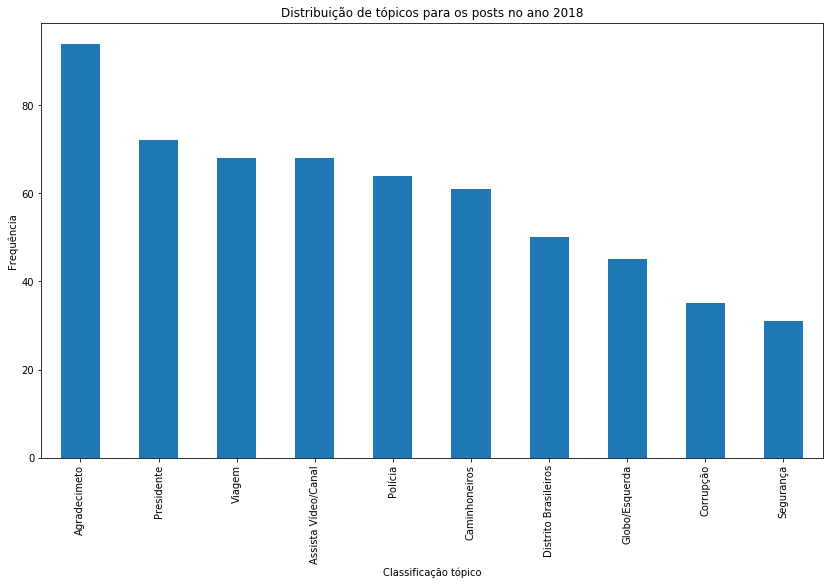

In [310]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018)
#===========================================================================

ax = category_count_2018.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para os posts no ano 2018")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [303]:
#===========================================================================
# ordenando df_election por reacoes angry
#===========================================================================

df_election_sorted_by_angry = df_election.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [306]:
#===========================================================================
# contando as categorias de tópicos apenas para as 20 postagens com +
# reações angry durante as eleições de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_election_sorted_by_angry.head(20)['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Assista Vídeo/Canal     5
Viagem                  3
Globo/Esquerda          3
Caminhoneiros           2
Presidente              2
Segurança               1
Agradecimeto            1
Distrito Brasileiros    1
Corrupção               1
Polícia                 1
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequency')

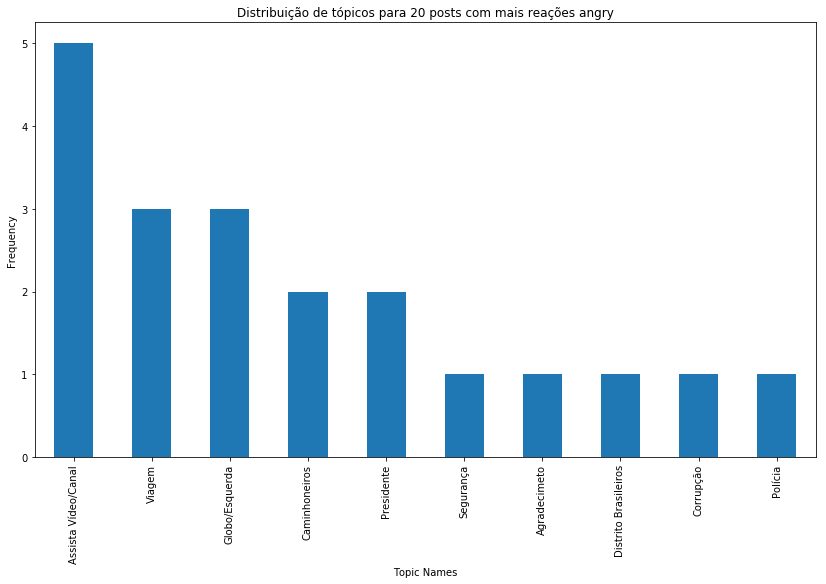

In [309]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 20)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para 20 posts com mais reações angry")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")